In [1]:
%matplotlib notebook
import seaborn as sns
import pandas as pd
import single_subject_DM
import helpers
import numpy as np
import collections

Loaded entropies from file (S=15000, entropy_bins=50)!
Loaded dot-level measures from file (S=2000, Smin=20)!


# Checking correlation between possible regressors

<IPython.core.display.Javascript object>


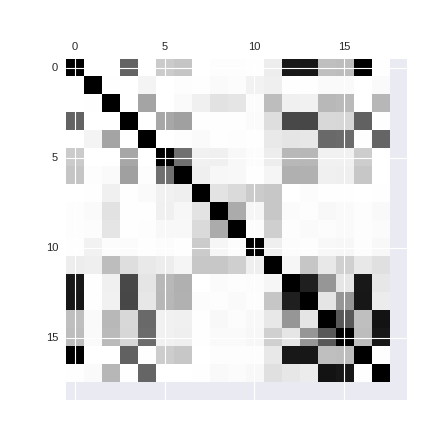

0                      dot_x
1                      dot_y
2            support_correct
3              correct_ideal
4     support_previous_ideal
5                    correct
6                   response
7                         RT
8                 is_correct
9           is_correct_ideal
10                trial_time
11                   entropy
12              logpost_left
13             logpost_right
14               loglik_left
15              loglik_right
16           m_evidence_left
17                  surprise
18                 intercept
dtype: object

In [2]:
sub = 2
DM = single_subject_DM.get_ithdot_DM(sub, doti=5)
img = sns.plt.matshow(DM.corr().abs())
img.figure.set_label('subject %d' % sub)
pd.Series(DM.columns)

<IPython.core.display.Javascript object>


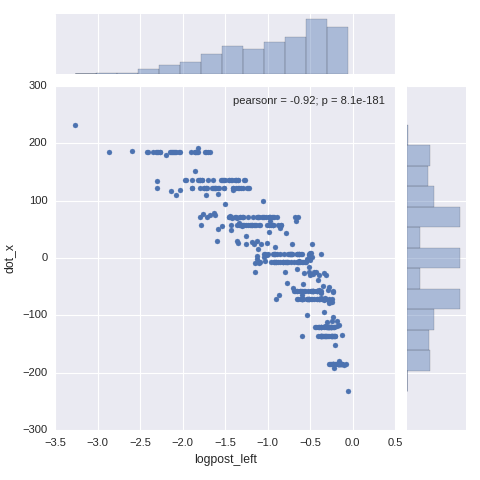

In [7]:
sns.jointplot('logpost_left', 'dot_x', data=DM);

<IPython.core.display.Javascript object>


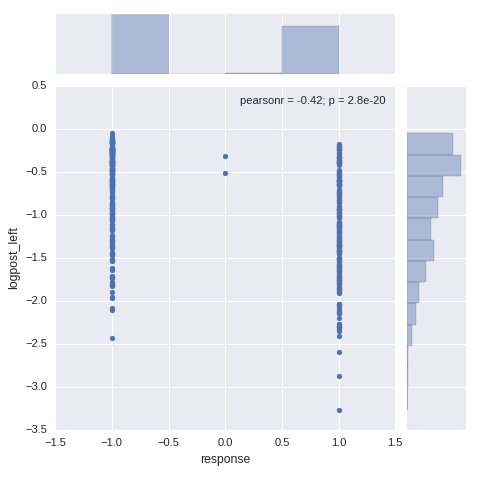

In [4]:
sns.jointplot('response', 'logpost_left', data=DM);

## Selection of regressors with low correlations

<IPython.core.display.Javascript object>


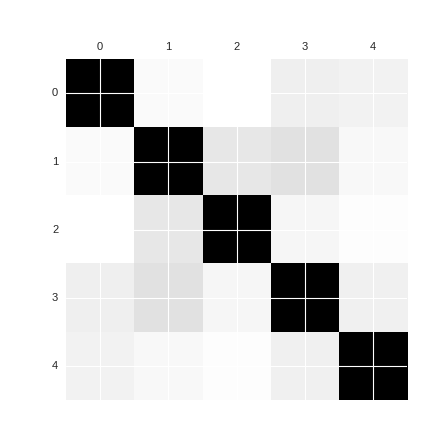

0           dot_y
1        surprise
2    logpost_left
3         entropy
4      trial_time
dtype: object

In [5]:
DM_lowr = DM[['dot_y', 'surprise', 'logpost_left', 'entropy', 'trial_time']]
img = sns.plt.matshow(DM_lowr.corr().abs())
img.figure.set_label('subject %d' % sub)
pd.Series(DM_lowr.columns)

# First cluster analysis

<IPython.core.display.Javascript object>


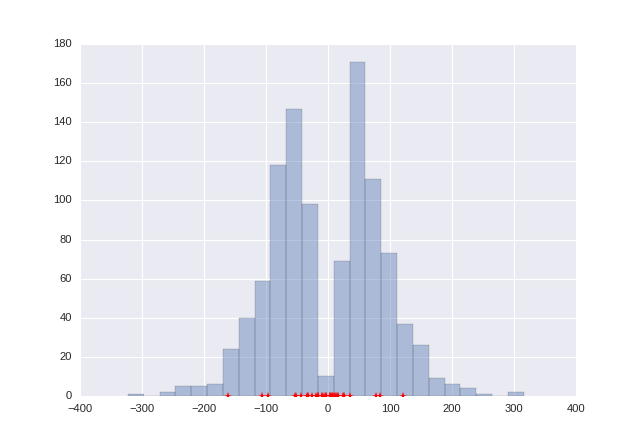

In [6]:
cluster_result = collections.namedtuple('cluster_result', 
                                        ['T_obs', 'clusters', 'pval', 'H0'])
subs = helpers.find_available_subjects(megdatadir='data/meg_final_data')
with np.load('data/inf_results/clusres_temp.npz') as res:
    clus_res = res['clus_res'][()]

H0 = clus_res[3].H0
clusters = clus_res[3].clusters
T_obs = clus_res[3].T_obs

sns.plt.figure();
ax = sns.distplot(H0, kde=False)
ax.plot([np.sum(T_obs[clus]) for clus in clusters], np.zeros(len(clusters)), '*r');